### Analise de dados: 
#### Séries temporais - concentração de poluentes no ar


Variáveis: umidade relativa (UR) e concentração de CO (CO_sensor).

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
file = "../datasets/air_quality_uci.csv"
cols = ["Date_Time", "CO_sensor", "RH"]

data = pd.read_csv(file, sep=",", usecols=cols, index_col=["Date_Time"])
data.index = pd.to_datetime(data.index, format='%d/%m/%Y %H:%M:%S')

data.head()

,CO_sensor,RH
Date_Time,,
2004-03-10 18:00:00,1360.0,48.9
2004-03-10 19:00:00,1292.0,47.7
2004-03-10 20:00:00,1402.0,54.0
2004-03-10 21:00:00,1376.0,60.0
2004-03-10 22:00:00,1272.0,59.6


In [19]:
data = data.loc["2004-04-04":"2005-04-04"]
data.index.min(), data.index.max()

(Timestamp('2004-04-04 00:00:00'), Timestamp('2005-04-04 14:00:00'))

In [20]:
data.isnull().sum()

CO_sensor    0
RH           0
dtype: int64

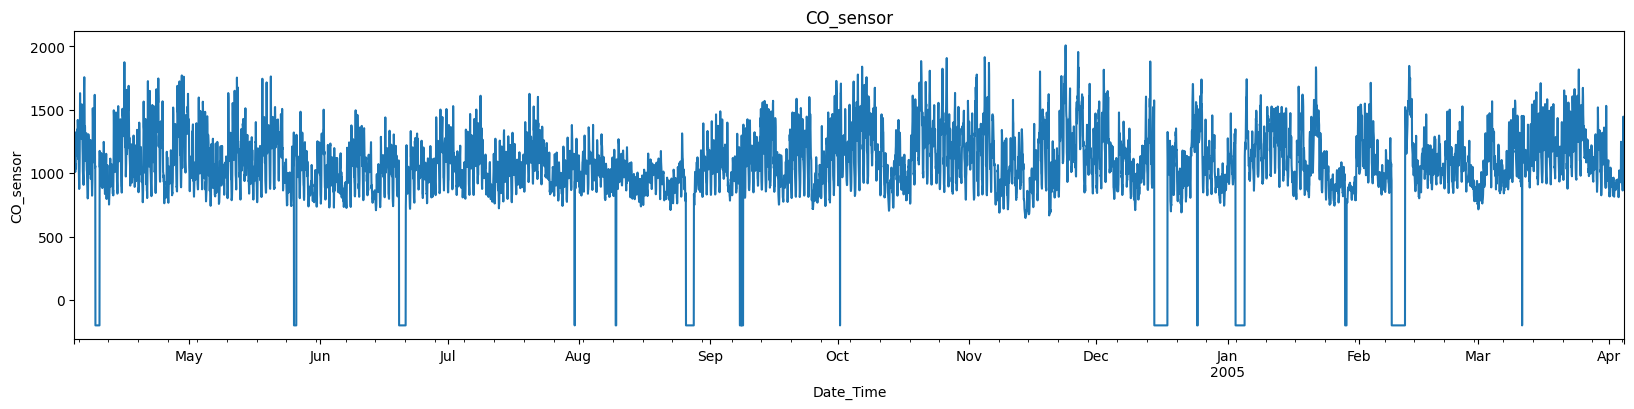

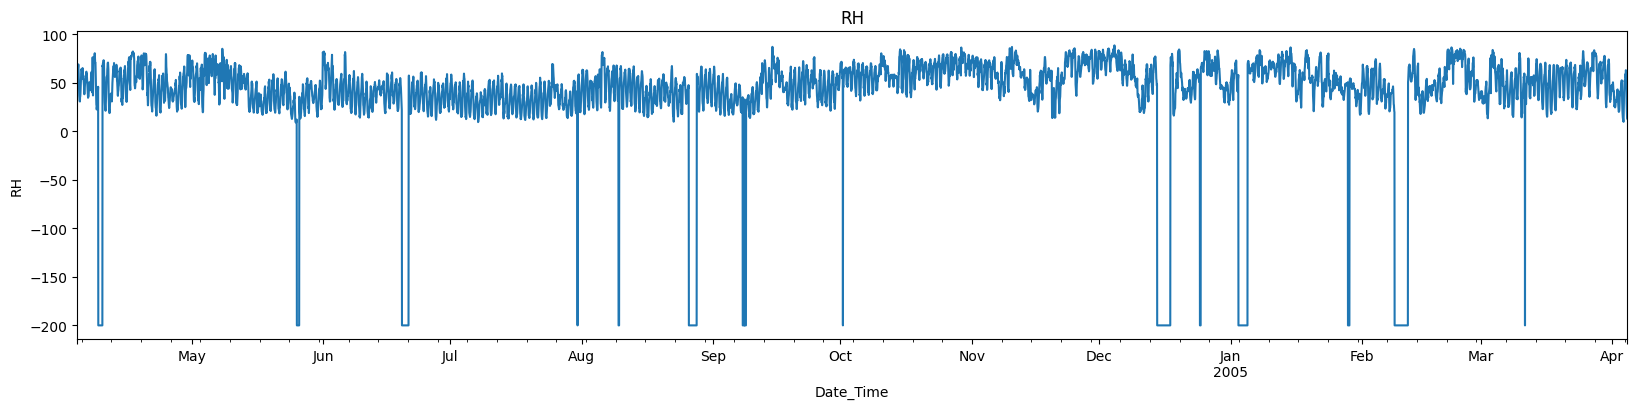

In [21]:
# Plot the time series.

for var in ["CO_sensor", "RH"]:
    data[var].plot(figsize=(20, 4))
    plt.title(var)
    plt.ylabel(var)
    plt.show()

In [22]:
# Remove outliers

data = data.loc[(data["CO_sensor"] >= 0) & (data["RH"] >= 0)]

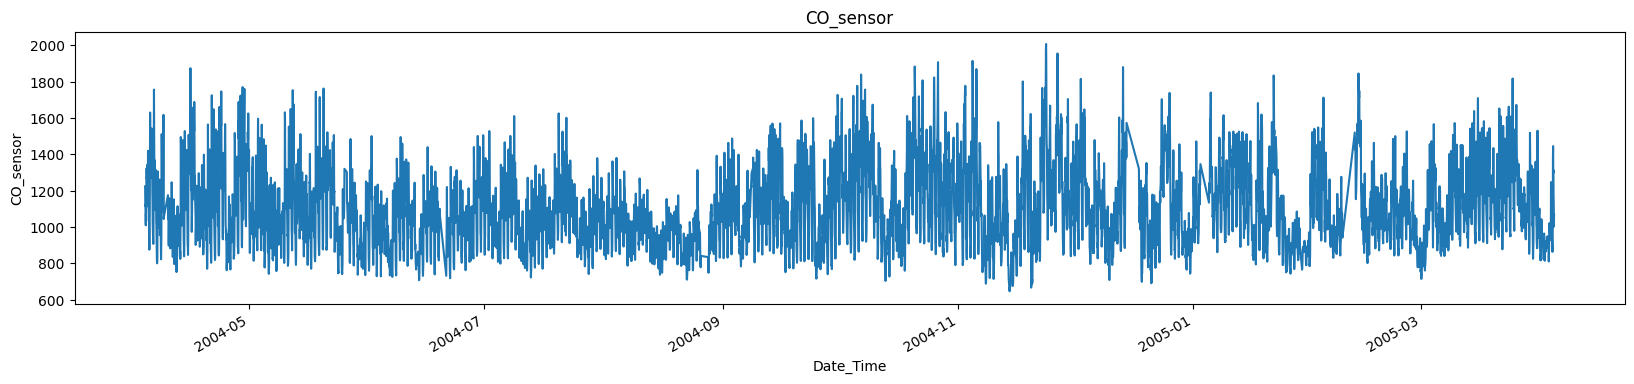

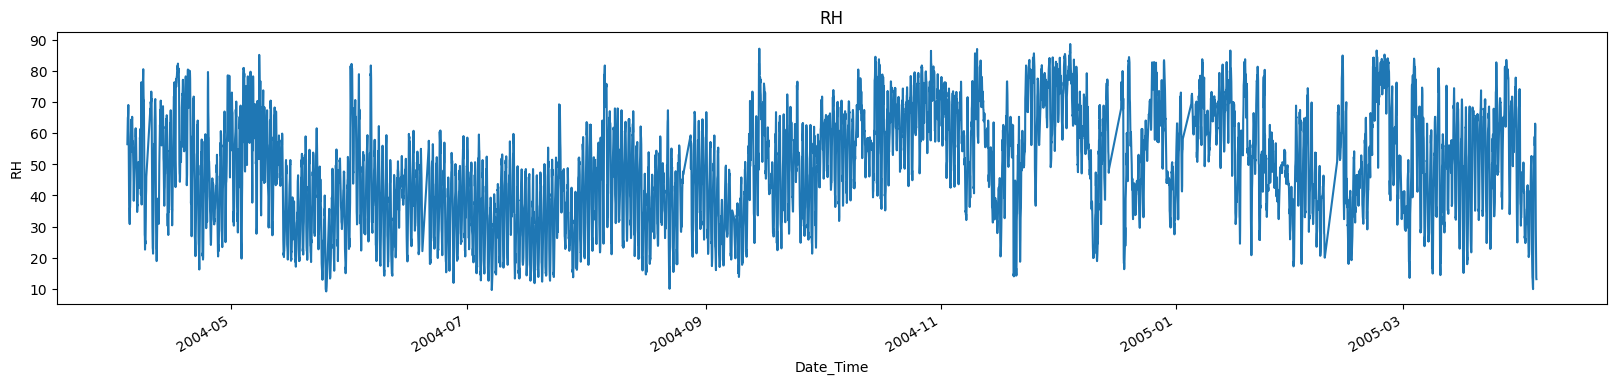

In [23]:
# Plot the time series.

for var in ["CO_sensor", "RH"]:
    data[var].plot(figsize=(20, 4))
    plt.title(var)
    plt.ylabel(var)
    plt.show()

/tmp/ipykernel_57870/676617454.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_imputed = data_.fillna(method="ffill")


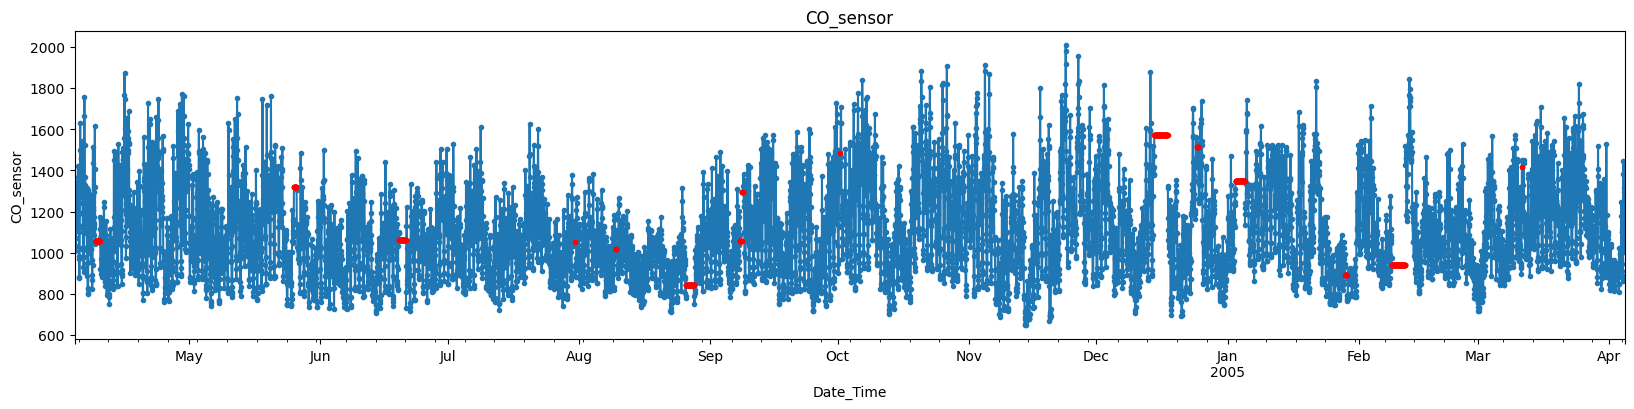

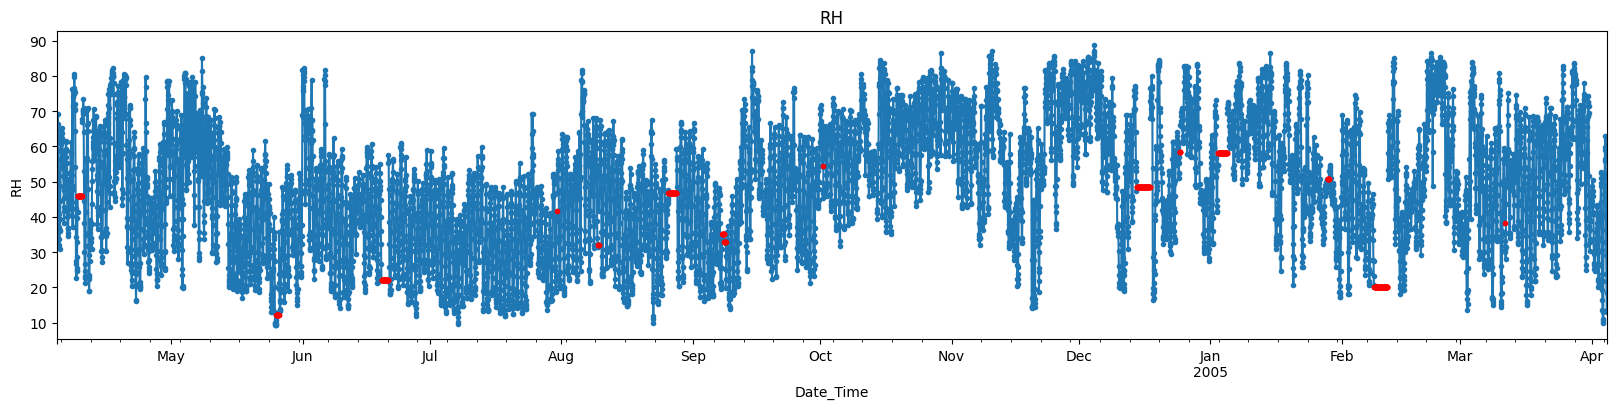

In [24]:
# Introduce the missing timestamps.
data_ = data.asfreq("1H")

data_imputed = data_.fillna(method="ffill")

for var in ["CO_sensor", "RH"]:
    ax = data_[var].plot(linestyle="-", marker=".", figsize=[20, 4])
    data_imputed[data_.isnull()][var].plot(ax=ax, legend=None, marker=".", color="r")
    plt.title(var)
    plt.ylabel(var)

    plt.show()

#### Sazonalidade 

A concentração de poluentes atmosféricos muda com o tráfego de automóveis. Na hora do rush, temos mais poluentes. Durante a noite, temos menos poluentes. Vamos ver se o que estou dizendo é verdade.

In [26]:
# Capture "time" in a new variable.
date_time = data.index.time
date_time = pd.Series(time_, index=data.index)
date_time.head()

Date_Time
2004-04-04 00:00:00    00:00:00
2004-04-04 01:00:00    01:00:00
2004-04-04 02:00:00    02:00:00
2004-04-04 03:00:00    03:00:00
2004-04-04 04:00:00    04:00:00
dtype: object

Text(0, 0.5, 'Concentration')

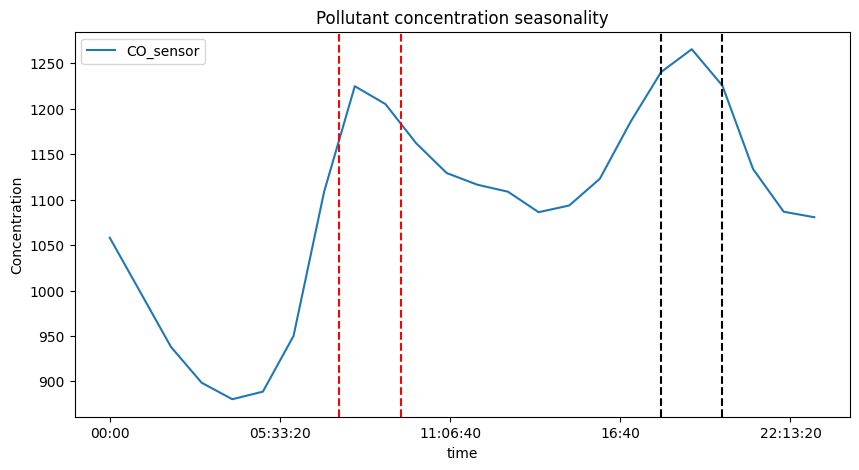

In [38]:
# Plot the average pollutant concentration per hour.

data.groupby(date_time)[["CO_sensor"]].mean().plot(figsize=(10, 5))
plt.title("Pollutant concentration seasonality")
plt.axvline(x="07:30", color="red", linestyle="--")
plt.axvline(x="09:30", color="red", linestyle="--")
plt.axvline(x="18:00", color="black", linestyle="--")
plt.axvline(x="20:00", color="black", linestyle="--")
plt.ylabel("Concentration")

Text(0, 0.5, 'Concentration')

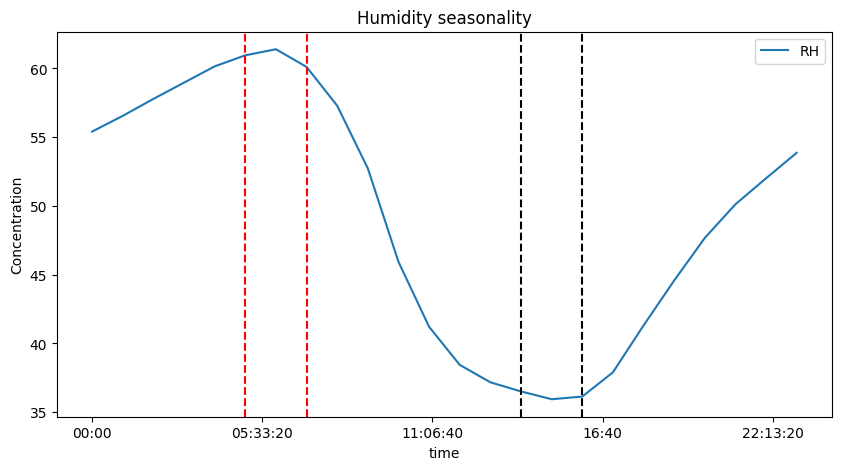

In [36]:
# Plot the average humidity per hour.

data.groupby(time_)[["RH"]].mean().plot(figsize=(10, 5))
plt.title("Humidity seasonality")
plt.axvline(x="05:00:00", color="red", linestyle="--")
plt.axvline(x="07:00:00", color="red", linestyle="--")
plt.axvline(x="14:00:00", color="black", linestyle="--")
plt.axvline(x="16:00:00", color="black", linestyle="--")
plt.ylabel("Concentration")

In [ ]:
# Mais poluentes são detectados por volta das 8-9 horas e novamente às 18-19 horas.